# Class Exercise: TechCorp Employee Analysis
## Introduction to Data Science - EDA & Visualization

**Scenario:** You have been hired as a Junior Data Scientist at "TechCorp." The HR director is worried about employee retention and wants a summary of the current workforce demographics.

**Objectives:**
1. Inspect and clean the data.
2. Visualize distributions (Univariate).
3. Analyze relationships between variables (Bivariate).

### Part 1: Setup
Run the cell below to generate the dataset for this exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate Synthetic Data
n_samples = 200
data = {
    'Employee_ID': [f'TC{i:03d}' for i in range(n_samples)],
    'Department': np.random.choice(['Sales', 'R&D', 'HR', 'Marketing'], n_samples),
    'Age': np.random.randint(22, 60, n_samples),
    'Salary': np.random.randint(40000, 120000, n_samples),
    'Experience_Years': np.random.randint(0, 20, n_samples),
    'Performance_Score': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.05, 0.1, 0.5, 0.25, 0.1]),
    'Attrition': np.random.choice(['Yes', 'No'], n_samples, p=[0.2, 0.8])
}

df = pd.DataFrame(data)

# Introduce some "dirty" data for the exercise
# 1. Add null values to Age
df.loc[df.sample(10).index, 'Age'] = np.nan

# 2. Add duplicates
df = pd.concat([df, df.iloc[:5]], ignore_index=True)

# 3. Corrupt Salary data (make high experience = high salary generally)
df['Salary'] = df['Salary'] + (df['Experience_Years'] * 2000)

print("Dataset loaded successfully. Variable name: df")
display(df.head())

Dataset loaded successfully. Variable name: df


,Employee_ID,Department,Age,Salary,Experience_Years,Performance_Score,Attrition
0,TC000,HR,53.0,131575,7,3,Yes
1,TC001,Marketing,NaN,76655,15,3,No
2,TC002,Sales,25.0,134031,12,2,Yes
3,TC003,HR,51.0,116429,0,3,Yes
4,TC004,HR,58.0,133766,19,4,No


### Part 2: Data Inspection & Cleaning

**Tasks:**
1. Check the **shape** (rows/columns) and **data types**.
2. Check for **duplicates** and remove them.
3. Check for **missing values** in the 'Age' column. Fill them with the **median** age.

In [4]:
# 1. Shape and Info
# TODO: Write code to print shape and info

# 1. Shape and Info
print(df.shape)
print(df.info())


(205, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        205 non-null    object 
 1   Department         205 non-null    object 
 2   Age                194 non-null    float64
 3   Salary             205 non-null    int32  
 4   Experience_Years   205 non-null    int32  
 5   Performance_Score  205 non-null    int64  
 6   Attrition          205 non-null    object 
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 9.7+ KB
None


In [ ]:
# 2. Duplicates
# TODO: Check for duplicates and drop them

duplicate_count = df.duplicated().sum()
print(duplicate_count)

# Remove 
df = df.drop_duplicates()
print(df.shape)


5
(200, 7)


In [6]:
# 3. Missing Values
# TODO: Fill missing Age values with the median
print( df['Age'].isna().sum())

median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

print(df['Age'].isna().sum())



10
0


### Part 3: Univariate Analysis

**Tasks:**
4. Plot a **Histogram** of `Salary`.
5. Plot a **Countplot** (Bar Chart) of `Department`.

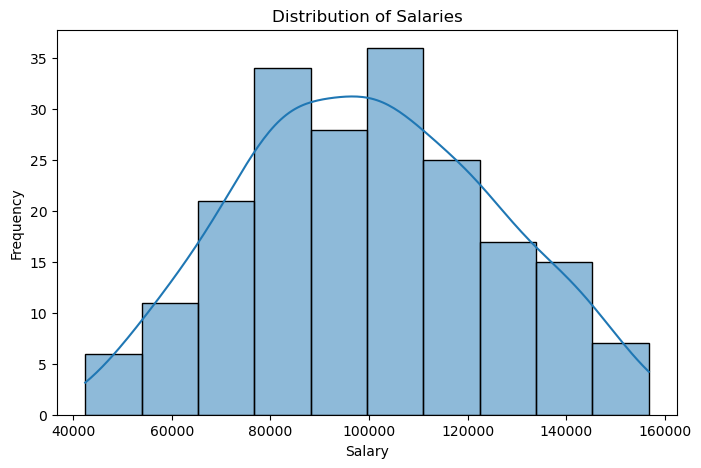

In [7]:
# 4. Salary Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Salary', kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


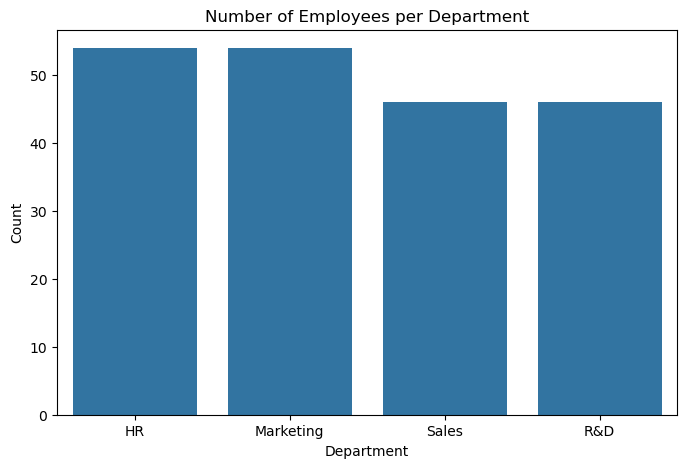

In [8]:
# 5. Department Countplot
# 5. Countplot of Department
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Department')
plt.title('Number of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


### Part 4: Bivariate Analysis

**Tasks:**
6. **Scatter Plot:** `Experience_Years` vs. `Salary`.
7. **Box Plot:** `Department` vs. `Age`.
8. **Box Plot:** `Attrition` vs. `Performance_Score`.

In [ ]:
# 6. Scatter Plot (Experience vs Salary)
plt.figure(figsize=(8, 5))
# TODO: Use sns.scatterplot

plt.show()

In [ ]:
# 7. Box Plot (Department vs Age)
plt.figure(figsize=(8, 5))
# TODO: Use sns.boxplot

plt.show()

In [ ]:
# 8. Box Plot (Attrition vs Performance)
plt.figure(figsize=(8, 5))
# TODO: Use sns.boxplot

plt.show()

---
### Instructor Solution Area
*(Optional: Run this to see the expected outputs)*

In [ ]:
# SOLUTIONS

# Cleaning
df = df.drop_duplicates()
df['Age'] = df['Age'].fillna(df['Age'].median())

# Univariate
plt.figure(figsize=(6, 4))
sns.histplot(df['Salary'], kde=True)
plt.title('Solution: Salary Dist')
plt.show()

# Bivariate
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Experience_Years', y='Salary', hue='Department')
plt.title('Solution: Exp vs Salary')
plt.show()